# Test pricing process

including 3 parts:  

Part 1. trivial test case  

Part 2. A test for spread option  
        compare with the true converged prices in paper Choi(2017) 

Part 3. A test for basket option 
        compare with the true converged prices in paper Choi(2017)  
        also compare with the results in paper wilmott_basket  

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from option_models import basket
from option_models import basket_normal_volatility as bnv

In [25]:
### only run this when you changed the class definition
import imp
imp.reload(basket)
imp.reload(bnv)

<module 'option_models.basket_normal_volatility' from 'C:\\Users\\Fu\\Documents\\GitHub\\Project-team_0001\\option_models\\basket_normal_volatility.py'>

# Part 1, trivial test case

weights
 [1 0 0 0]


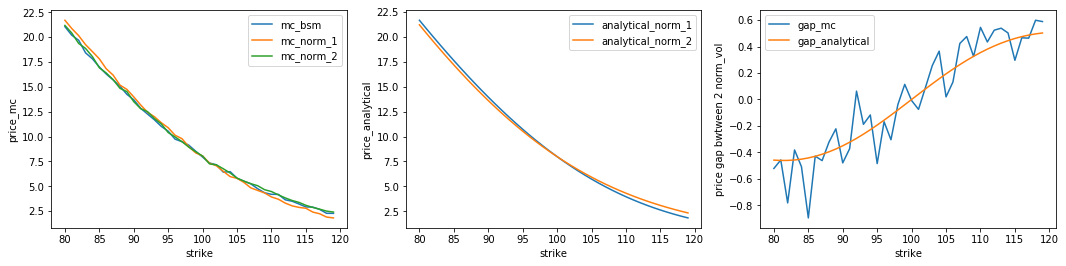

In [131]:
# A trivial test case 1: 
# one asset have 100% weight (the others zero)
# the case should be equivalent to the BSM or Normal model price
# compare two methods of estimating normal vol: 1. norm_vol_k=S0_k*bsm_vol_k 
#                                               2. norm_impvol_k=0.5*(Sk_0+Sk_T)*bsm_norm_k

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.array([1, 0, 0, 0])
divr = np.zeros(4)
intr = 0
cor_m = 0.8*np.identity(4) + 0.2*np.ones((4,4))
texp = 1
print('weights\n',weights)
np.random.seed(123456)

strikerng = np.arange(80,120,1)
p_mc_bsm = []
p_mc_norm_1 = []
p_mc_norm_2 = []
p_analytical_norm_1 = []
p_analytical_norm_2 = []

for strike in strikerng:
    # normal model pricing
    norm_vol1 = vol * spot
    norm_vol2 = bnv.basket_normal_volatility(strike, spot, vol, weights, texp, cor_m)
    p_mc_norm_1.append(basket.basket_price_mc(strike, spot, norm_vol1, weights, texp, cor_m, bsm=False))
    p_mc_norm_2.append(basket.basket_price_mc(strike, spot, norm_vol2, weights, texp, cor_m, bsm=False))

    p_analytical_norm_1.append(basket.basket_price_norm_analytic( \
                         strike, spot, norm_vol1, weights, texp, cor_m))
    p_analytical_norm_2.append(basket.basket_price_norm_analytic( \
                         strike, spot, norm_vol2, weights, texp, cor_m))

    # BSM model pricing
    p_mc_bsm.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    
priceFrm = pd.DataFrame({'mc_norm_1':p_mc_norm_1,
                       'mc_norm_2':p_mc_norm_2,
                       'analytical_norm_1':p_analytical_norm_1,
                       'analytical_norm_2':p_analytical_norm_2,
                       'mc_bsm':p_mc_bsm
                      },index=strikerng)

priceFrm['gap_mc']=priceFrm['mc_norm_2']-priceFrm['mc_norm_1']
priceFrm['gap_analytical']=priceFrm['analytical_norm_2']-priceFrm['analytical_norm_1']

fig = plt.figure(figsize=(18, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.plot(strikerng, p_mc_bsm, label='mc_bsm')
ax1.plot(strikerng, p_mc_norm_1, label='mc_norm_1')
ax1.plot(strikerng, p_mc_norm_2, label='mc_norm_2')
ax2.plot(strikerng, p_analytical_norm_1, label='analytical_norm_1')
ax2.plot(strikerng, p_analytical_norm_2, label='analytical_norm_2')
ax3.plot(strikerng, priceFrm.gap_mc, label='gap_mc')
ax3.plot(strikerng, priceFrm.gap_analytical, label='gap_analytical')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax3.set_xlabel('strike')
ax1.set_ylabel('price_mc')
ax2.set_ylabel('price_analytical')
ax3.set_ylabel('price gap bwtween 2 norm_vol')
plt.show()

weights
 [ 0.25  0.25  0.25  0.25]


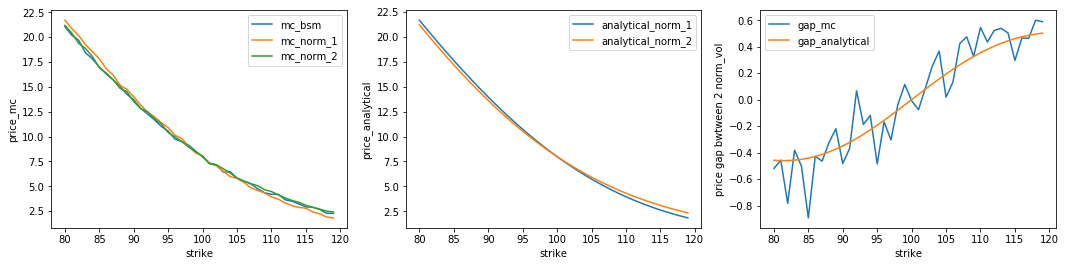

In [132]:
# A trivial test case 2: 
# all assets almost perfectly correlated:
# the case should be equivalent to the BSM or Normal model price
# compare two methods of estimating normal vol: 1. norm_vol_k=S0_k*bsm_vol_k,  
#                                               2. norm_impvol_k=0.5*(Sk_0+Sk_T)*bsm_norm_k

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.0001*np.identity(4) + 0.9999*np.ones((4,4))
texp = 1
print('weights\n',weights)
np.random.seed(123456)

strikerng = np.arange(80,120,1)
p_mc_norm_1 = []
p_mc_norm_2 = []
p_analytical_norm_1 = []
p_analytical_norm_2 = []
p_mc_bsm = []

for strike in strikerng:
    # normal model pricing
    norm_vol1 = vol * spot
    norm_vol2 = bnv.basket_normal_volatility(strike, spot, vol, weights, texp, cor_m)
    p_mc_norm_1.append(basket.basket_price_mc(strike, spot, norm_vol1, weights, texp, cor_m, bsm=False))
    p_mc_norm_2.append(basket.basket_price_mc(strike, spot, norm_vol2, weights, texp, cor_m, bsm=False))

    p_analytical_norm_1.append(basket.basket_price_norm_analytic( \
                         strike, spot, norm_vol1, weights, texp, cor_m))
    p_analytical_norm_2.append(basket.basket_price_norm_analytic( \
                         strike, spot, norm_vol2, weights, texp, cor_m))

    # BSM model pricing
    p_mc_bsm.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    
priceFrm = pd.DataFrame({'mc_norm_1':p_mc_norm_1,
                       'mc_norm_2':p_mc_norm_2,
                       'analytical_norm_1':p_analytical_norm_1,
                       'analytical_norm_2':p_analytical_norm_2,
                       'mc_bsm':p_mc_bsm
                      },index=strikerng)

priceFrm['gap_mc']=priceFrm['mc_norm_2']-priceFrm['mc_norm_1']
priceFrm['gap_analytical']=priceFrm['analytical_norm_2']-priceFrm['analytical_norm_1']

fig = plt.figure(figsize=(18, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ax1.plot(strikerng, p_mc_bsm, label='mc_bsm')
ax1.plot(strikerng, p_mc_norm_1, label='mc_norm_1')
ax1.plot(strikerng, p_mc_norm_2, label='mc_norm_2')
ax2.plot(strikerng, p_analytical_norm_1, label='analytical_norm_1')
ax2.plot(strikerng, p_analytical_norm_2, label='analytical_norm_2')
ax3.plot(strikerng, priceFrm.gap_mc, label='gap_mc')
ax3.plot(strikerng, priceFrm.gap_analytical, label='gap_analytical')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax3.set_xlabel('strike')
ax1.set_ylabel('price_mc')
ax2.set_ylabel('price_analytical')
ax3.set_ylabel('price gap bwtween 2 norm_vol')
plt.show()

# Part 2, A test for spread option

## compare with Choi(2017)

## 1.test for S1 parameters (varying K)

In [133]:
spot = np.array([100, 96])
vol = np.array([0.2, 0.1])
# strieke
weights = np.array([1, -1])
divr = np.array([1, 1])*0.05
intr = 0.1
cor_m = np.array([[1, 0.5], [0.5, 1]])
texp = 1

strikerng = np.arange(0, 4.1, 0.4)

weights
 [ 1 -1]
        analytical_norm_1  analytical_norm_2  true_converged_prices  \
strike                                                                
0.0                8.3398             8.3452                 8.5132   
0.4                8.1257             8.1444                 8.3125   
0.8                7.9149             7.9470                 8.1150   
1.2                7.7074             7.7529                 7.9208   
1.6                7.5031             7.5623                 7.7299   
2.0                7.3022             7.3750                 7.5423   
2.4                7.1046             7.1911                 7.3580   
2.8                6.9102             7.0105                 7.1769   
3.2                6.7192             6.8332                 6.9991   
3.6                6.5316             6.6593                 6.8245   
4.0                6.3472             6.4886                 6.6531   

        error_analytical_1  error_analytical_2  
strike    

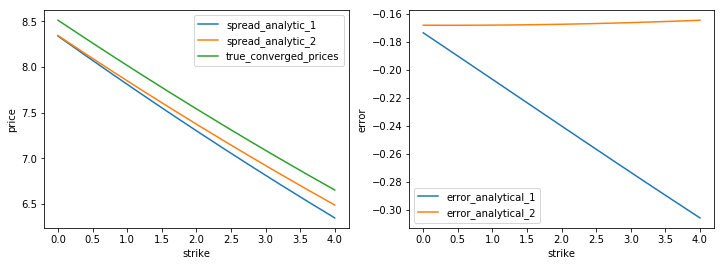

In [135]:
print('weights\n',weights)
p_analytical_1 = []
p_analytical_2 = []

for strike in strikerng:
    norm_vol1 = vol * spot
    norm_vol2 = bnv.basket_normal_volatility(strike, spot, vol, weights, texp, cor_m, intr=intr, divr=divr)

    p_analytical_1.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol1, weights, texp, cor_m, intr=intr, divr=divr))
    p_analytical_2.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol2, weights, texp, cor_m, intr=intr, divr=divr))

priceFrm = pd.DataFrame({
                       'analytical_norm_1':p_analytical_1,
                       'analytical_norm_2':p_analytical_2,
                        },index=strikerng)
priceFrm.index.name = 'strike'
# The true converged value from the paper Choi(2017)
priceFrm['true_converged_prices']=np.array([8.51322520, 8.31246070, 8.11499380, 7.92081980, \
                                            7.72993250, 7.54232390, 7.35798430, 7.17690240, \
                                            6.99906510, 6.82445810, 6.65306510])
priceFrm['error_analytical_1']=priceFrm['analytical_norm_1']-priceFrm['true_converged_prices']
priceFrm['error_analytical_2']=priceFrm['analytical_norm_2']-priceFrm['true_converged_prices']
pd.set_option('precision', 4)
print(priceFrm)
n = len(priceFrm)
print('\t\tstd_1\t\tstd_2\n\t\t%.4f\t\t%.4f'%(np.sqrt((priceFrm.error_analytical_1**2).sum()/n),\
                                  np.sqrt((priceFrm.error_analytical_2**2).sum()/n)))
 

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(strikerng, p_analytical_1, label='spread_analytic_1')
ax1.plot(strikerng, p_analytical_2, label='spread_analytic_2')
ax1.plot(strikerng, priceFrm.true_converged_prices, label='true_converged_prices')
ax2.plot(strikerng, priceFrm.error_analytical_1, label='error_analytical_1')
ax2.plot(strikerng, priceFrm.error_analytical_2, label='error_analytical_2')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('error')

plt.show()

As we can see, the new normal volatility computation method (2) improved the results a lot compared with the simple normal vol. 

## 2.test for S2 parameters(varying rho)

In [136]:
texp = 1
spot = np.array([200, 100])
strike = 100
weights = np.array([1, -1])
vol = np.array([0.15, 0.3])
# rho
divr = 0
intr = 0

rhorng = np.arange(0.9, -1, -0.2)

weights
 [ 1 -1]
      analytical_norm_1  analytical_norm_2  true_converged_prices  \
rho                                                                 
 0.9             5.3524             5.3330                 5.4793   
 0.7             9.2706             9.2067                 9.3209   
 0.5            11.9683            11.8676                11.9805   
 0.3            14.1610            14.0296                14.1426   
 0.1            16.0571            15.8991                16.0102   
-0.1            17.7518            17.5701                17.6770   
-0.3            19.2983            19.0951                19.1954   
-0.5            20.7296            20.5067                20.5983   
-0.7            22.0684            21.8272                21.9078   
-0.9            23.3305            23.0721                23.1399   

      error_analytical_1  error_analytical_2  
rho                                           
 0.9             -0.1269             -0.1462  
 0.7         

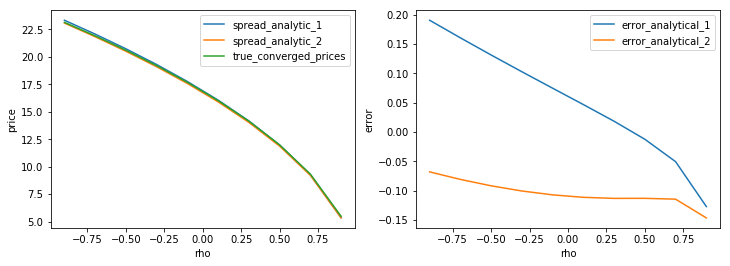

In [137]:
print('weights\n',weights)
p_analytical_1 = []
p_analytical_2 = []

for rho in rhorng:
    cor_m = np.array([[1, rho], [rho, 1]])
    
    norm_vol1 = vol * spot
    norm_vol2 = bnv.basket_normal_volatility(strike, spot, vol, weights, texp, cor_m, intr=intr, divr=divr)

    p_analytical_1.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol1, weights, texp, cor_m, intr=intr, divr=divr))
    p_analytical_2.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol2, weights, texp, cor_m, intr=intr, divr=divr))
    
priceFrm = pd.DataFrame({
                       'analytical_norm_1':p_analytical_1,
                       'analytical_norm_2':p_analytical_2,
                        },index=rhorng)
priceFrm.index.name = 'rho'
priceFrm['true_converged_prices']=np.array([5.47927200, 9.32094390, 11.98049180, 14.14258690, \
                                            16.01021900, 17.67702490, 19.19542010, 20.59827050, \
                                            21.90779890, 23.13986740])
priceFrm['error_analytical_1']=priceFrm['analytical_norm_1']-priceFrm['true_converged_prices']
priceFrm['error_analytical_2']=priceFrm['analytical_norm_2']-priceFrm['true_converged_prices']
print(priceFrm)
n = len(priceFrm)
print('\t\tstd_1\t\tstd_2\n\t\t%.4f\t\t%.4f'%(np.sqrt((priceFrm.error_analytical_1**2).sum()/n),\
                                  np.sqrt((priceFrm.error_analytical_2**2).sum()/n)))
 

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(rhorng, p_analytical_1, label='spread_analytic_1')
ax1.plot(rhorng, p_analytical_2, label='spread_analytic_2')
ax1.plot(rhorng, priceFrm.true_converged_prices, label='true_converged_prices')
ax2.plot(rhorng, priceFrm.error_analytical_1, label='error_analytical_1')
ax2.plot(rhorng, priceFrm.error_analytical_2, label='error_analytical_2')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('rho')
ax2.set_xlabel('rho')
ax1.set_ylabel('price')
ax2.set_ylabel('error')

plt.show()

The figure indicates that when rho is negative, the new normal volatility method is better, but when rho is positive it is worse.

# Part 3, A test for basket option

## 1. compare with Choi(2017)
### 1.1 test for B1 (varying K)

In [138]:
texp = 5
spot = np.ones(4) * 100
# strike
weights = np.ones(4) * 0.25
vol = np.ones(4) * 0.4
cor_m = 0.5 * np.identity(4) + 0.5 * np.ones((4,4))
divr = 0
intr = 0

strikerng = np.arange(50,151,10)

weights
 [ 0.25  0.25  0.25  0.25]
        analytical_norm_1  analytical_norm_2  true_converged_prices  \
strike                                                                
50                59.9821            54.9211                54.3102   
60                52.6064            47.9856                47.4811   
70                45.7109            41.9044                41.5225   
80                39.3304            36.6321                36.3518   
90                33.4911            32.0954                31.8768   
100               28.2095            28.2095                28.0074   
110               23.4911            24.8882                24.6605   
120               19.3304            22.0506                21.7626   
130               15.7109            19.6239                19.2493   
140               12.6064            17.5445                17.0655   
150                9.9821            15.7580                15.1640   

        error_analytical_1  error_analyti

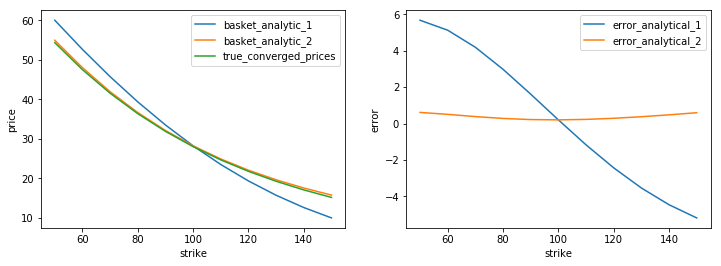

In [139]:
print('weights\n',weights)
p_analytical_1 = []
p_analytical_2 = []

for strike in strikerng:
    
    norm_vol1 = vol * spot
    norm_vol2 = bnv.basket_normal_volatility(strike, spot, vol, weights, texp, cor_m, intr=intr, divr=divr)

    p_analytical_1.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol1, weights, texp, cor_m, intr=intr, divr=divr))
    p_analytical_2.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol2, weights, texp, cor_m, intr=intr, divr=divr))
    
priceFrm = pd.DataFrame({
                       'analytical_norm_1':p_analytical_1,
                       'analytical_norm_2':p_analytical_2,
                        },index=strikerng)
priceFrm.index.name = 'strike'
priceFrm['true_converged_prices']=np.array([54.31017610, 47.48112650, 41.52251920, 36.35178430, \
                                            31.87680320, 28.00736950, 24.66052950, 21.76257890, \
                                            19.24932940, 17.06554200, 15.16401030])
priceFrm['error_analytical_1']=priceFrm['analytical_norm_1']-priceFrm['true_converged_prices']
priceFrm['error_analytical_2']=priceFrm['analytical_norm_2']-priceFrm['true_converged_prices']
print(priceFrm)
n = len(priceFrm)
print('\t\tstd_1\t\tstd_2\n\t\t%.4f\t\t%.4f'%(np.sqrt((priceFrm.error_analytical_1**2).sum()/n),\
                                  np.sqrt((priceFrm.error_analytical_2**2).sum()/n)))
 

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(strikerng, p_analytical_1, label='basket_analytic_1')
ax1.plot(strikerng, p_analytical_2, label='basket_analytic_2')
ax1.plot(strikerng, priceFrm.true_converged_prices, label='true_converged_prices')
ax2.plot(strikerng, priceFrm.error_analytical_1, label='error_analytical_1')
ax2.plot(strikerng, priceFrm.error_analytical_2, label='error_analytical_2')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('error')

plt.show()

The graph shows that the new volatility method is much closer to the true prices.

### 1.2 test for B1 (varying rho)

In [140]:
texp = 5
spot = np.ones(4) * 100
strike = 100
weights = np.ones(4) * 0.25
vol = np.ones(4) * 0.4
# rho
divr = 0
intr = 0

rhorng = np.array([-0.1, 0.1, 0.3, 0.5, 0.8 ,0.95])

weights
 [ 0.25  0.25  0.25  0.25]
       analytical_norm_1  analytical_norm_2  true_converged_prices  \
rho                                                                  
-0.10            14.9271            14.9271                17.7569   
 0.10            20.3421            20.3421                21.6921   
 0.30            24.5925            24.5925                25.0293   
 0.50            28.2095            28.2095                28.0074   
 0.80            32.8976            32.8976                32.0412   
 0.95            35.0070            35.0070                33.9187   

       error_analytical_1  error_analytical_2  
rho                                            
-0.10             -2.8299             -2.8299  
 0.10             -1.3500             -1.3500  
 0.30             -0.4368             -0.4368  
 0.50              0.2021              0.2021  
 0.80              0.8564              0.8564  
 0.95              1.0884              1.0884  
		std_1		std_2
		1.4

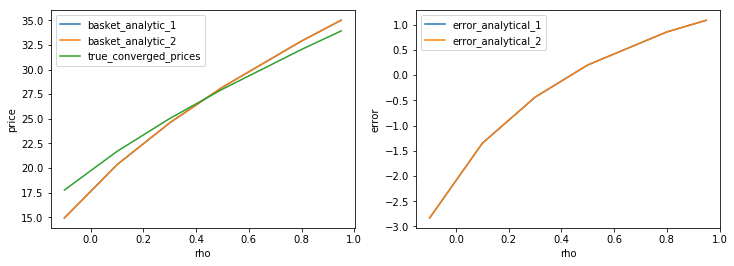

In [141]:
print('weights\n',weights)
p_analytical_1 = []
p_analytical_2 = []

for rho in rhorng:
    cor_m = (1 - rho) * np.identity(4) + rho * np.ones((4,4))
    
    norm_vol1 = vol * spot
    norm_vol2 = bnv.basket_normal_volatility(strike, spot, vol, weights, texp, cor_m, intr=intr, divr=divr)

    p_analytical_1.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol1, weights, texp, cor_m, intr=intr, divr=divr))
    p_analytical_2.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol2, weights, texp, cor_m, intr=intr, divr=divr))
    
priceFrm = pd.DataFrame({
                       'analytical_norm_1':p_analytical_1,
                       'analytical_norm_2':p_analytical_2,
                        },index=rhorng)
priceFrm.index.name = 'rho'
priceFrm['true_converged_prices']=np.array([17.75691630, 21.69209650, 25.02929920, 28.00736950, \
                                            32.04122650, 33.91868740])
priceFrm['error_analytical_1']=priceFrm['analytical_norm_1']-priceFrm['true_converged_prices']
priceFrm['error_analytical_2']=priceFrm['analytical_norm_2']-priceFrm['true_converged_prices']
print(priceFrm)
n = len(priceFrm)
print('\t\tstd_1\t\tstd_2\n\t\t%.4f\t\t%.4f'%(np.sqrt((priceFrm.error_analytical_1**2).sum()/n),\
                                  np.sqrt((priceFrm.error_analytical_2**2).sum()/n)))
 

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(rhorng, p_analytical_1, label='basket_analytic_1')
ax1.plot(rhorng, p_analytical_2, label='basket_analytic_2')
ax1.plot(rhorng, priceFrm.true_converged_prices, label='true_converged_prices')
ax2.plot(rhorng, priceFrm.error_analytical_1, label='error_analytical_1')
ax2.plot(rhorng, priceFrm.error_analytical_2, label='error_analytical_2')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('rho')
ax2.set_xlabel('rho')
ax1.set_ylabel('price')
ax2.set_ylabel('error')

plt.show()

When K=spot, these two methods lead to the same results.

### 1.3 test for B1 (varying sigma)

In [142]:
texp = 5
spot = np.ones(4) * 100
strike = 100
weights = np.ones(4) * 0.25
# vol
cor_m = 0.5 * np.identity(4) + 0.5 * np.ones((4,4))
divr = 0
intr = 0

sigmarng = np.array([0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1])

weights
 [ 0.25  0.25  0.25  0.25]
       analytical_norm_1  analytical_norm_2  true_converged_prices  \
sigma                                                                
0.05              3.5262             3.5262                19.4591   
0.10              7.0524             7.0524                20.9682   
0.20             14.1047            14.1047                25.3794   
0.40             28.2095            28.2095                36.0485   
0.60             42.3142            42.3142                46.8189   
0.80             56.4190            56.4190                56.7772   
1.00             70.5237            70.5237                65.4256   

       error_analytical_1  error_analytical_2  
sigma                                          
0.05             -15.9329            -15.9329  
0.10             -13.9159            -13.9159  
0.20             -11.2747            -11.2747  
0.40              -7.8391             -7.8391  
0.60              -4.5047             -4.5047 

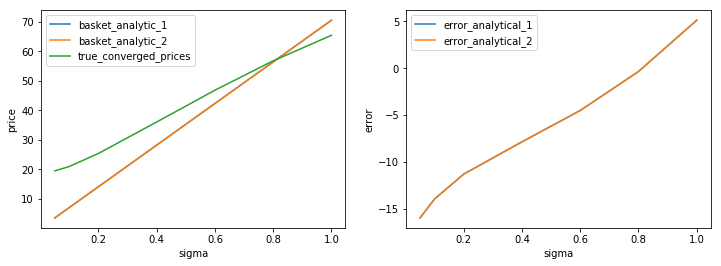

In [143]:
print('weights\n',weights)
p_analytical_1 = []
p_analytical_2 = []

for sigma in sigmarng:
    vol = np.ones(4) * sigma
    
    norm_vol1 = vol * spot
    norm_vol2 = bnv.basket_normal_volatility(strike, spot, vol, weights, texp, cor_m, intr=intr, divr=divr)

    p_analytical_1.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol1, weights, texp, cor_m, intr=intr, divr=divr))
    p_analytical_2.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol2, weights, texp, cor_m, intr=intr, divr=divr))
    
priceFrm = pd.DataFrame({
                       'analytical_norm_1':p_analytical_1,
                       'analytical_norm_2':p_analytical_2,
                        },index=sigmarng)
priceFrm.index.name = 'sigma'
priceFrm['true_converged_prices']=np.array([19.45909500, 20.96823210, 25.37942390, 36.04854070, 46.81891860, \
                                            56.77721980, 65.42560030])
priceFrm['error_analytical_1']=priceFrm['analytical_norm_1']-priceFrm['true_converged_prices']
priceFrm['error_analytical_2']=priceFrm['analytical_norm_2']-priceFrm['true_converged_prices']
print(priceFrm)
n = len(priceFrm)
print('\t\tstd_1\t\tstd_2\n\t\t%.4f\t\t%.4f'%(np.sqrt((priceFrm.error_analytical_1**2).sum()/n),\
                                  np.sqrt((priceFrm.error_analytical_2**2).sum()/n)))
 

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.plot(sigmarng, p_analytical_1, label='basket_analytic_1')
ax1.plot(sigmarng, p_analytical_2, label='basket_analytic_2')
ax1.plot(sigmarng, priceFrm.true_converged_prices, label='true_converged_prices')
ax2.plot(sigmarng, priceFrm.error_analytical_1, label='error_analytical_1')
ax2.plot(sigmarng, priceFrm.error_analytical_2, label='error_analytical_2')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('sigma')
ax2.set_xlabel('sigma')
ax1.set_ylabel('price')
ax2.set_ylabel('error')

plt.show()

When K=spot, the two methods lead to the same results.

### 1.4 test or B2 (varying T and K)

In [144]:
# T
spot = np.ones(7) * 100
# strike
weights = np.array([0.1, 0.15, 0.15, 0.05, 0.2, 0.1, 0.25])
vol = np.array([11.55, 20.68, 14.53, 17.99, 15.59, 14.62, 15.68]) / 100
cor_m = np.array([[1.00, 0.35, 0.10, 0.27, 0.04, 0.17, 0.71],
                  [0.35, 1.00, 0.39, 0.27, 0.50, -0.08, 0.15],
                  [0.10, 0.39, 1.00, 0.53, 0.70, -0.23, 0.09],
                  [0.27, 0.27, 0.53, 1.00, 0.46, -0.22, 0.32],
                  [0.04, 0.50, 0.70, 0.46, 1.00, -0.29, 0.13],
                  [0.17, -0.08, -0.23, -0.22, -0.29, 1.00, -0.03],
                  [0.71, 0.15, 0.09, 0.32, 0.13, -0.03, 1.00]])
divr = np.array([1.69, 2.39, 1.36, 1.92, 0.81, 3.62, 1.66]) / 100
intr = 0.063

Trng = np.array([0.5, 1, 2, 3])
strikerng = np.array([80, 100,120])

weights
 [ 0.1   0.15  0.15  0.05  0.2   0.1   0.25]
       error_analytical_1                         error_analytical_2          \
texp                  0.5     1.0     2.0     3.0                0.5     1.0   
strike                                                                         
80                 0.0006  0.0086  0.0270  0.0292        -2.1591e-05 -0.0011   
100               -0.0271 -0.0707 -0.1686 -0.2599        -3.0848e-02 -0.0801   
120               -0.0151 -0.1551 -0.5885 -0.9734        -5.4992e-04 -0.0223   

                        
texp       2.0     3.0  
strike                  
80     -0.0106 -0.0255  
100    -0.1902 -0.2914  
120    -0.1731 -0.3953  


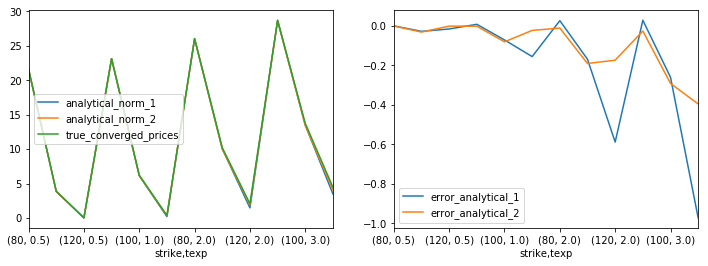

In [145]:
print('weights\n',weights)
p_analytical_1 = []
p_analytical_2 = []
T = []
K = []

for texp in Trng:
    for strike in strikerng:
        
        norm_vol1 = vol * spot
        norm_vol2 = bnv.basket_normal_volatility(strike, spot, vol, weights, texp, cor_m, intr=intr, divr=divr)

        p_analytical_1.append(basket.basket_price_norm_analytic( \
                              strike, spot, norm_vol1, weights, texp, cor_m, intr=intr, divr=divr))
        p_analytical_2.append(basket.basket_price_norm_analytic( \
                              strike, spot, norm_vol2, weights, texp, cor_m, intr=intr, divr=divr))
        T.append(texp)
        K.append(strike)
    
priceFrm = pd.DataFrame({
                       'texp': T,
                       'strike': K,
                       'analytical_norm_1':p_analytical_1,
                       'analytical_norm_2':p_analytical_2
                        })

priceFrm['true_converged_prices']=np.array([21.60225460, 3.88283530, 0.02351890, 23.14116270, 6.22168100, 0.35355840, \
                                            26.04243280, 10.21560120, 2.05700440, 28.69926020, 13.74255800, 4.45783890])
priceFrm['error_analytical_1']=priceFrm['analytical_norm_1']-priceFrm['true_converged_prices']
priceFrm['error_analytical_2']=priceFrm['analytical_norm_2']-priceFrm['true_converged_prices']
priceFrm = priceFrm.set_index(['strike','texp'])
print(priceFrm[['error_analytical_1','error_analytical_2']].unstack())


fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
priceFrm[['analytical_norm_1','analytical_norm_2','true_converged_prices']].plot(kind='line', ax=ax1)
priceFrm[['error_analytical_1','error_analytical_2']].plot(kind='line', ax=ax2)
plt.show()

It seems that the new normal volatility method is better

## 2.compare with wilmott_baskets

### 2.1 varying rho

In [146]:
texp = 5
# rho=0.5
strike = 100
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
intr = 0.0
divr = 0.0

rhorng = np.array([0.1, 0.3, 0.5, 0.7, 0.8, 0.95])

weights
 [ 0.25  0.25  0.25  0.25]
      norm_1  norm_2  mc_cv  Beisser  Gentle     Ju   Levy  MP-RG  MP-4M
rho                                                                     
0.1    20.34   20.34  21.62    20.12   15.36  21.77  22.06  20.25  21.36
0.3    24.59   24.59  24.97    24.21   19.62  25.05  25.17  22.54  24.91
0.5    28.21   28.21  27.97    27.63   23.78  28.01  28.05  24.50  27.98
0.7    31.41   31.41  30.72    30.62   27.98  30.74  30.75  26.18  30.74
0.8    32.90   32.90  32.03    31.99   30.13  32.04  32.04  26.93  32.04
0.95   35.01   35.01  33.92    33.92   33.41  33.92  33.92  27.97  33.92
Dev     0.84    0.84    NaN     0.70    4.01   0.07   0.20   4.12   0.11


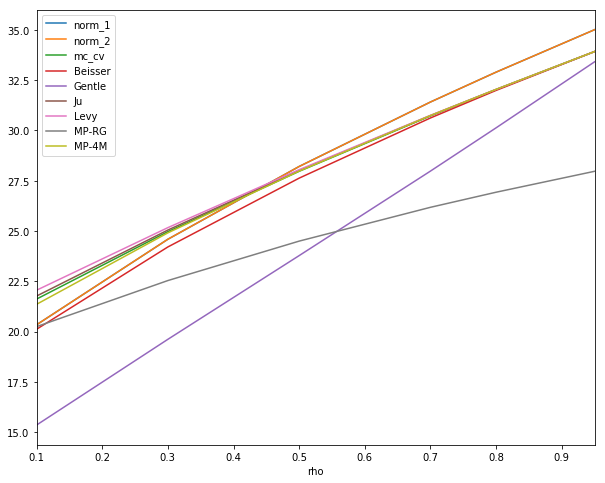

In [147]:
print('weights\n',weights)
p_analytical_1 = []
p_analytical_2 = []

for rho in rhorng:
    cor_m = (1 - rho) * np.identity(4) + rho * np.ones((4,4))
    
    norm_vol1 = vol * spot
    norm_vol2 = bnv.basket_normal_volatility(strike, spot, vol, weights, texp, cor_m, intr=intr, divr=divr)

    p_analytical_1.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol1, weights, texp, cor_m, intr=intr, divr=divr))
    p_analytical_2.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol2, weights, texp, cor_m, intr=intr, divr=divr))
    

# compare with willmott_basket (Monte Carlo CV results)
priceFrm2 = pd.DataFrame({
                       'norm_1':p_analytical_1,
                       'norm_2':p_analytical_2,
                        },index=rhorng)
priceFrm2.index.name = 'rho'
priceFrm2['mc_cv'] = np.array([21.62, 24.97, 27.97, 30.72, 32.03, 33.92])
priceFrm2['Beisser'] = np.array([20.12, 24.21, 27.63, 30.62, 31.99, 33.92])
priceFrm2['Gentle'] = np.array([15.36, 19.62, 23.78, 27.98, 30.13, 33.41])
priceFrm2['Ju'] = np.array([21.77, 25.05, 28.01, 30.74, 32.04, 33.92])
priceFrm2['Levy'] = np.array([22.06, 25.17, 28.05, 30.75, 32.04, 33.92])
priceFrm2['MP-RG'] = np.array([20.25, 22.54, 24.5, 26.18, 26.93, 27.97])
priceFrm2['MP-4M'] = np.array([21.36, 24.91, 27.98, 30.74, 32.04, 33.92])
Dev_norm_1 = np.sqrt(((priceFrm2['norm_1']-priceFrm2['mc_cv'])**2).sum() / len(priceFrm2))
Dev_norm_2 = np.sqrt(((priceFrm2['norm_2']-priceFrm2['mc_cv'])**2).sum() / len(priceFrm2))
priceFrm2.loc['Dev']={'Beisser':0.7, 
                     'Gentle':4.013, 
                      'Ju':0.071, 
                      'Levy':0.203,
                      'MP-RG':4.119, 
                      'MP-4M':0.108, 
                      'norm_1':Dev_norm_1, 
                      'norm_2':Dev_norm_2, 
                      'mc_cv':np.nan
                     }
pd.set_option('precision', 2)
print(priceFrm2)
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
priceFrm2.drop(['Dev'], inplace=True)
priceFrm2.plot(kind='line', ax=ax1)
plt.show()

### 2.2 varying strike

In [148]:
texp = 5
rho=0.5
cor_m = (1 - rho) * np.identity(4) + rho * np.ones((4,4))
# strike = 100
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
intr = 0.0
divr = 0.0

strikerng = np.arange(50,151,10)

weights
 [ 0.25  0.25  0.25  0.25]
        norm_1  norm_2  mc_cv  Beisser  Gentle     Ju   Levy  MP-RG  MP-4M
strike                                                                    
50       59.98   54.92  54.28    54.16   51.99  54.31  54.34  51.93  54.35
60       52.61   47.99  47.45    47.27   44.43  47.48  47.52  44.41  47.50
70       45.71   41.90  41.50    41.26   37.93  41.52  41.57  38.01  41.53
80       39.33   36.63  36.52    36.04   32.04  36.36  36.40  32.68  36.34
90       33.49   32.10  31.85    31.53   27.73  31.88  31.92  28.22  31.86
100      28.21   28.21  27.98    27.63   23.78  28.01  28.05  24.50  27.98
110      23.49   24.89  24.63    24.27   20.46  24.67  24.70  21.39  24.63
120      19.33   22.05  21.74    21.36   17.65  21.77  21.80  18.77  21.73
130      15.71   19.62  19.22    18.84   15.27  19.26  19.28  16.57  19.22
140      12.61   17.54  17.05    16.65   13.25  17.07  17.10  14.70  17.04
150       9.98   15.76  15.15    14.75   11.53  15.17  15.19  13.

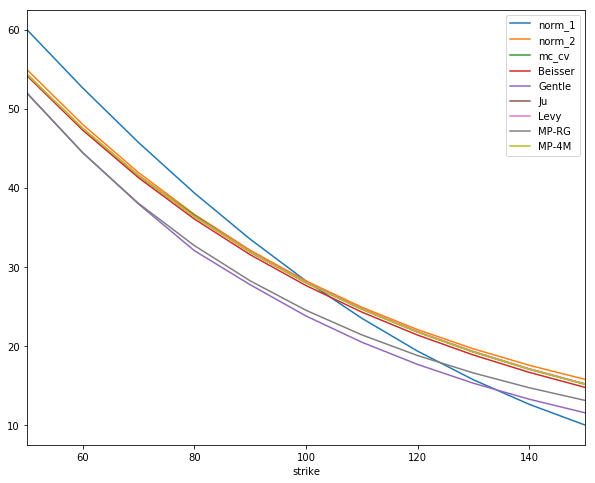

In [149]:
print('weights\n',weights)
p_analytical_1 = []
p_analytical_2 = []

for strike in strikerng:
    
    norm_vol1 = vol * spot
    norm_vol2 = bnv.basket_normal_volatility(strike, spot, vol, weights, texp, cor_m, intr=intr, divr=divr)

    p_analytical_1.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol1, weights, texp, cor_m, intr=intr, divr=divr))
    p_analytical_2.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol2, weights, texp, cor_m, intr=intr, divr=divr))
    

# compare with willmott_basket (Monte Carlo CV results)
priceFrm2 = pd.DataFrame({
                       'norm_1':p_analytical_1,
                       'norm_2':p_analytical_2,
                        },index=strikerng)
priceFrm2.index.name = 'strike'
priceFrm2['mc_cv'] = np.array([54.28, 47.45, 41.5, 36.52, 31.85, 27.98, 24.63, \
                               21.74, 19.22, 17.05, 15.15])
priceFrm2['Beisser'] = np.array([54.16, 47.27, 41.26, 36.04, 31.53, 27.63, 24.27, \
                                 21.36, 18.84, 16.65, 14.75])
priceFrm2['Gentle'] = np.array([51.99, 44.43, 37.93, 32.04, 27.73, 23.78, 20.46, \
                                17.65, 15.27, 13.25, 11.53])
priceFrm2['Ju'] = np.array([54.31, 47.48, 41.52, 36.36, 31.88, 28.01, 24.67, 21.77, \
                            19.26, 17.07, 15.17])
priceFrm2['Levy'] = np.array([54.34, 47.52, 41.57, 36.4, 31.92, 28.05, 24.7, 21.8, 19.28, \
                              17.1, 15.19])
priceFrm2['MP-RG'] = np.array([51.93, 44.41, 38.01, 32.68, 28.22, 24.5, 21.39, 18.77, 16.57, \
                               14.7, 13.1])
priceFrm2['MP-4M'] = np.array([54.35, 47.5, 41.53, 36.34, 31.86, 27.98, 24.63, 21.73, \
                               19.22, 17.04, 15.14])
Dev_norm_1 = np.sqrt(((priceFrm2['norm_1']-priceFrm2['mc_cv'])**2).sum() / len(priceFrm2))
Dev_norm_2 = np.sqrt(((priceFrm2['norm_2']-priceFrm2['mc_cv'])**2).sum() / len(priceFrm2))
priceFrm2.loc['Dev']={'Beisser':0.323, 
                     'Gentle':3.746, 
                      'Ju':0.031, 
                      'Levy':0.065,
                      'MP-RG':3.038, 
                      'MP-4M':0.03, 
                      'norm_1':Dev_norm_1, 
                      'norm_2':Dev_norm_2, 
                      'mc_cv':np.nan
                     }
pd.set_option('precision', 2)
print(priceFrm2)
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
priceFrm2.drop(['Dev'], inplace=True)
priceFrm2.plot(kind='line', ax=ax1)
plt.show()

### 2.3 varying forward price (spot price)

In [150]:
texp = 5
rho=0.5
cor_m = (1 - rho) * np.identity(4) + rho * np.ones((4,4))
strike = 100
# spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
intr = 0.0
divr = 0.0

spotpricerng = np.arange(50,151,10)

weights
 [ 0.25  0.25  0.25  0.25]
      norm_1  norm_2  mc_cv  Beisser  Gentle     Ju   Levy  MP-RG  MP-4M
spot                                                                    
50      1.26    4.92   4.34     4.16    3.00   4.34   4.34   3.93   4.33
60      3.94    7.99   7.50     7.27    5.53   7.51   7.52   6.56   7.50
70      8.27   11.90  11.53    11.26    8.91  11.55  11.57   9.95  11.53
80     13.96   16.63  16.35    16.04   13.13  16.37  16.40  14.10  16.34
90     20.70   22.10  21.86    21.53   18.11  21.89  21.92  18.97  21.86
100    28.21   28.21  27.98    27.63   23.78  28.01  28.05  24.50  27.98
110    36.29   34.89  34.63    34.27   30.08  34.66  34.70  30.63  34.63
120    44.79   42.05  41.71    41.36   36.91  41.75  41.80  37.32  41.73
130    53.61   49.62  49.19    48.84   44.21  49.23  49.28  44.49  49.21
140    62.67   57.54  57.00    56.65   51.92  57.04  57.10  52.08  57.03
150    71.93   65.76  65.08    64.75   59.98  65.13  65.19  60.05  65.14
Dev     3.70    

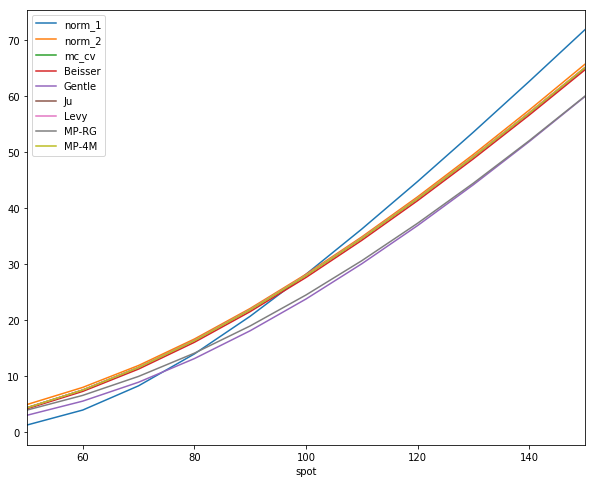

In [151]:
print('weights\n',weights)
p_analytical_1 = []
p_analytical_2 = []

for spotprice in spotpricerng:
    spot = np.ones(4) * spotprice
    
    norm_vol1 = vol * spot
    norm_vol2 = bnv.basket_normal_volatility(strike, spot, vol, weights, texp, cor_m, intr=intr, divr=divr)

    p_analytical_1.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol1, weights, texp, cor_m, intr=intr, divr=divr))
    p_analytical_2.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol2, weights, texp, cor_m, intr=intr, divr=divr))
    

# compare with willmott_basket (Monte Carlo CV results)
priceFrm2 = pd.DataFrame({
                       'norm_1':p_analytical_1,
                       'norm_2':p_analytical_2,
                        },index=strikerng)
priceFrm2.index.name = 'spot'
priceFrm2['mc_cv'] = np.array([4.34 ,7.5, 11.53, 16.35, 21.86, 27.98, 34.63, 41.71, \
                               49.19, 57, 65.08])
priceFrm2['Beisser'] = np.array([4.16, 7.27, 11.26, 16.04, 21.53, 27.63, 34.27, 41.36, \
                                 48.84, 56.65, 64.75])
priceFrm2['Gentle'] = np.array([3, 5.53, 8.91, 13.13, 18.11, 23.78, 30.08, 36.91, \
                                44.21, 51.92, 59.98])
priceFrm2['Ju'] = np.array([4.34, 7.51, 11.55, 16.37, 21.89, 28.01, 34.66, 41.75, \
                            49.23, 57.04, 65.13])
priceFrm2['Levy'] = np.array([4.34, 7.52, 11.57, 16.4, 21.92, 28.05, 34.7, 41.8, \
                              49.28, 57.1, 65.19])
priceFrm2['MP-RG'] = np.array([3.93, 6.56, 9.95, 14.1, 18.97, 24.5, 30.63, 37.32, \
                               44.49, 52.08, 60.05])
priceFrm2['MP-4M'] = np.array([4.33, 7.5, 11.53, 16.34, 21.86, 27.98, 34.63, 41.73, \
                               49.21, 57.03, 65.14])
Dev_norm_1 = np.sqrt(((priceFrm2['norm_1']-priceFrm2['mc_cv'])**2).sum() / len(priceFrm2))
Dev_norm_2 = np.sqrt(((priceFrm2['norm_2']-priceFrm2['mc_cv'])**2).sum() / len(priceFrm2))
priceFrm2.loc['Dev']={'Beisser':0.316, 
                     'Gentle':3.989, 
                      'Ju':0.031, 
                      'Levy':0.072,
                      'MP-RG':3.516, 
                      'MP-4M':0.022, 
                      'norm_1':Dev_norm_1, 
                      'norm_2':Dev_norm_2, 
                      'mc_cv':np.nan
                     }
pd.set_option('precision', 2)
print(priceFrm2)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
priceFrm2.drop(['Dev'], inplace=True)
priceFrm2.plot(kind='line', ax=ax1)
plt.show()

### 2.4 varying sigma

In [152]:
texp = 5
rho=0.5
cor_m = (1 - rho) * np.identity(4) + rho * np.ones((4,4))
strike = 100
spot = np.ones(4) * 100
# vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
intr = 0.0
divr = 0.0

sigmarng = np.array([5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 100]) / 100

weights
 [ 0.25  0.25  0.25  0.25]
       norm_1  norm_2  mc_cv  Beisser  Gentle     Ju   Levy  MP-RG  MP-4M
sigma                                                                    
0.05     3.53    3.53   3.53     3.53    3.52   3.53   3.53   3.52   3.53
0.1      7.05    7.05   7.05     7.04    6.98   7.05   7.05   6.99   7.05
0.15    10.58   10.58  10.57    10.55   10.33  10.57  10.57  10.36  10.57
0.2     14.10   14.10  15.08    14.03   13.52  14.08  14.08  13.59  14.08
0.3     21.16   21.16  21.07    20.91   19.22  21.08  21.09  19.49  21.07
0.4     28.21   28.21  27.98    27.63   23.78  28.01  28.05  24.50  27.98
0.5     35.26   35.26  34.80    34.15   27.01  34.84  34.96  28.51  34.73
0.6     42.31   42.31  41.44    40.41   28.84  41.52  41.78  31.56  41.19
0.7     49.37   49.37  47.86    46.39   29.30  47.97  48.05  33.72  46.23
0.8     56.42   56.42  54.01    52.05   28.57  54.09  55.05  35.15  48.39
1.0     70.52   70.52  65.31    62.32   24.41  64.93  67.24  36.45  47.90
Dev

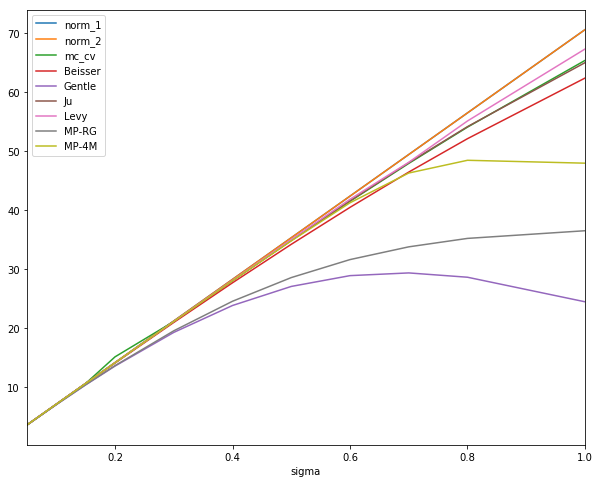

In [153]:
print('weights\n',weights)
p_analytical_1 = []
p_analytical_2 = []

for sigma in sigmarng:
    vol = np.ones(4) * sigma
    
    norm_vol1 = vol * spot
    norm_vol2 = bnv.basket_normal_volatility(strike, spot, vol, weights, texp, cor_m, intr=intr, divr=divr)

    p_analytical_1.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol1, weights, texp, cor_m, intr=intr, divr=divr))
    p_analytical_2.append(basket.basket_price_norm_analytic( \
                          strike, spot, norm_vol2, weights, texp, cor_m, intr=intr, divr=divr))
    

# compare with willmott_basket (Monte Carlo CV results)
priceFrm2 = pd.DataFrame({
                       'norm_1':p_analytical_1,
                       'norm_2':p_analytical_2,
                        },index=sigmarng)
priceFrm2.index.name = 'sigma'
priceFrm2['mc_cv'] = np.array([3.53, 7.05, 10.57, 15.08, 21.07, 27.98, 34.8, 41.44, 47.86, \
                               54.01, 65.31])
priceFrm2['Beisser'] = np.array([3.53, 7.04, 10.55, 14.03, 20.91, 27.63, 34.15, 40.41, \
                                 46.39, 52.05, 62.32])
priceFrm2['Gentle'] = np.array([3.52, 6.98, 10.33, 13.52, 19.22, 23.78, 27.01, 28.84, \
                                29.3, 28.57, 24.41])
priceFrm2['Ju'] = np.array([3.53, 7.05, 10.57, 14.08, 21.08, 28.01, 34.84, 41.52, \
                            47.97, 54.09, 64.93])
priceFrm2['Levy'] = np.array([3.53, 7.05, 10.57, 14.08, 21.09, 28.05, 34.96, 41.78, \
                              48.05, 55.05, 67.24])
priceFrm2['MP-RG'] = np.array([3.52, 6.99, 10.36, 13.59, 19.49, 24.5, 28.51, 31.56, \
                               33.72, 35.15, 36.45])
priceFrm2['MP-4M'] = np.array([3.53, 7.05, 10.57, 14.08, 21.07, 27.98, 34.73, 41.19, \
                               46.23, 48.39, 47.9])
Dev_norm_1 = np.sqrt(((priceFrm2['norm_1']-priceFrm2['mc_cv'])**2).sum() / len(priceFrm2))
Dev_norm_2 = np.sqrt(((priceFrm2['norm_2']-priceFrm2['mc_cv'])**2).sum() / len(priceFrm2))
priceFrm2.loc['Dev']={'Beisser':1.22, 
                     'Gentle':16.25, 
                      'Ju':0.12, 
                      'Levy':0.69,
                      'MP-RG':11.83, 
                      'MP-4M':5.53, 
                      'norm_1':Dev_norm_1, 
                      'norm_2':Dev_norm_2, 
                      'mc_cv':np.nan
                     }
pd.set_option('precision', 2)
print(priceFrm2)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(1, 1, 1)
priceFrm2.drop(['Dev'], inplace=True)
priceFrm2.plot(kind='line', ax=ax1)
plt.show()